## **IMPORTING DATASETS FROM KAGGLE**

In [1]:
# Importing datasets from Kaggle

!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manasakrishnan","key":"b09f4c8ef46fba3f4bca450a5a6ae52a"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download grassknoted/asl-alphabet --force

 99% 1.02G/1.03G [00:25<00:00, 68.3MB/s]
100% 1.03G/1.03G [00:25<00:00, 43.8MB/s]


In [7]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

## **IMPORTING THE NECESSARY LIBRARIES**

In [9]:
# !pip install fastai --upgrade

     |████████████████████████████████| 197 kB 11.3 MB/s 
     |████████████████████████████████| 60 kB 6.2 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
# import fastai
from fastai.vision.all import *

## **INTERPRETATION OF THE DATA**

Width of image: 200
Height of image: 200


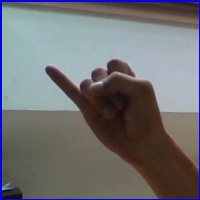

In [3]:
train_path = '/content/asl_alphabet_train/asl_alphabet_train/'
test_path = '/content/asl_alphabet_test/asl_alphabet_test/'
sample_image = '/content/asl_alphabet_train/asl_alphabet_train/J/J1.jpg'
img = Image.open(sample_image)
w, h = img.size
print("Width of image:", w)
print("Height of image:", h)
img

In [4]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock), get_items = get_image_files, get_y = parent_label, splitter = RandomSplitter(valid_pct = 0.2), item_tfms = Resize(128))
file = get_image_files(train_path)
print(file[1])
print(file[1].parent.name)

/content/asl_alphabet_train/asl_alphabet_train/space/space2525.jpg
space


In [5]:
dataloaders = db.dataloaders(train_path, bs = 32)

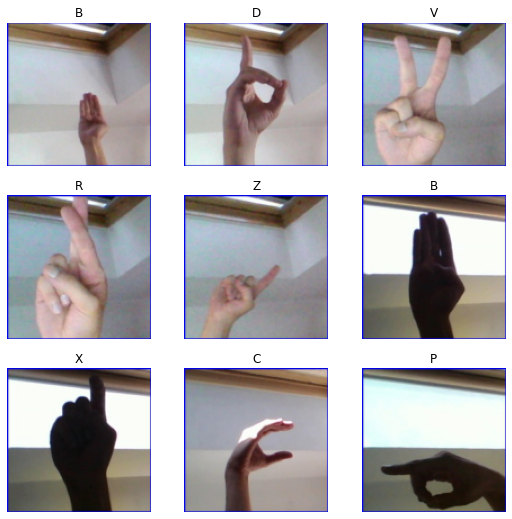

In [6]:
dataloaders.show_batch()

## **TRAINING THE MODEL**

In [7]:
model_temp = cnn_learner(dataloaders, models.resnet50, metrics = [accuracy], loss_func = CrossEntropyLossFlat())

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
model_temp.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.123151,0.036036,0.989253,09:38


epoch,train_loss,valid_loss,accuracy,time
0,0.064136,0.008875,0.997471,12:36
1,0.020279,0.001276,0.999713,12:30
2,0.002857,0.000580,0.999770,12:29


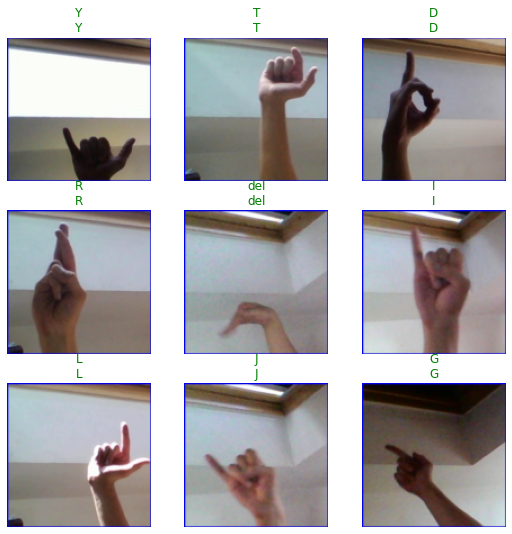

In [ ]:
model_temp.show_results()

## **TESTING THE MODEL**

In [ ]:
test_images_temp = get_image_files(test_path) 
test_dataloaders_temp = model_temp.dls.test_dl(test_images_temp) 
pred_temp, _ = model_temp.get_preds(dl = test_dataloaders_temp) 
preds_temp = pred_temp.argmax(dim = -1).numpy() 

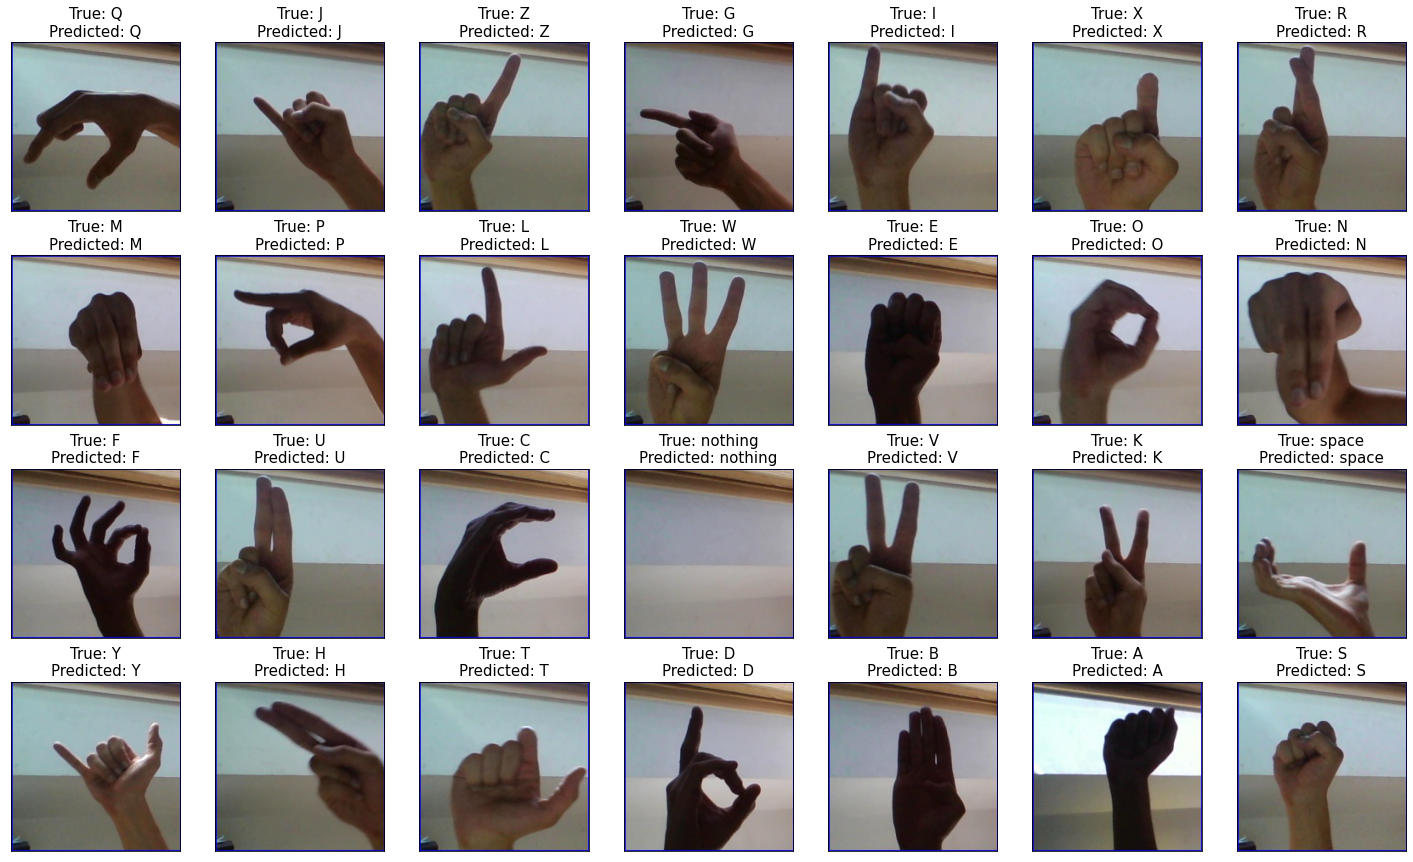

In [ ]:
df_test_temp = pd.DataFrame(os.listdir(test_path)).rename(columns={0:'Image_Name'}) 
df_test_temp['Actual_Value'] = df_test_temp['Image_Name'].str.split('_').str[0]
df_test_temp['Predicted_Value'] = preds_temp
vocab = dict(zip(np.arange(29), dataloaders.vocab))
df_test_temp['Predicted_Value'] = df_test_temp['Predicted_Value'].replace(vocab)
df_test_temp['Image_Path'] = test_path + df_test_temp['Image_Name']
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(20, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_test_temp['Image_Path'].iloc[i]))
    ax.set_title(f"True: {df_test_temp.Actual_Value.iloc[i]}\nPredicted: {df_test_temp.Predicted_Value.iloc[i]}", fontsize = 15)
plt.tight_layout()
plt.show()